In [1]:
import numpy as np
import os
import cv2
from tqdm import tqdm
from matplotlib import pyplot as plt

In [2]:
# read 3 frames of images
img_path1 = 'KITTI_sequence_2/image_l/000009.png'
img_path2 = 'KITTI_sequence_2/image_l/000010.png'
img_path3 = 'KITTI_sequence_2/image_l/000011.png'

img1 = cv2.imread(img_path1)
img2 = cv2.imread(img_path2)
img3 = cv2.imread(img_path3)

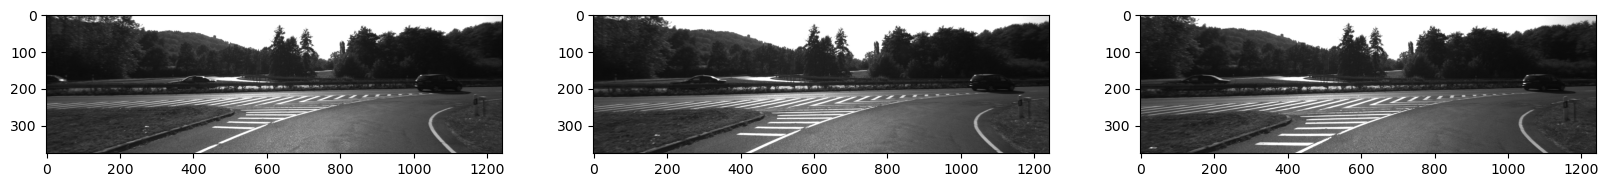

In [12]:
# show images horizontally
fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(1, 3, 1)
ax1.imshow(img1)
ax2 = fig.add_subplot(1, 3, 2)
ax2.imshow(img2)
ax3 = fig.add_subplot(1, 3, 3)
ax3.imshow(img3)
plt.show()

In [4]:
feature_detector = cv2.SIFT_create()
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(indexParams=index_params, searchParams=search_params)

In [5]:
kp1, des1 = feature_detector.detectAndCompute(img1, None)
kp2, des2 = feature_detector.detectAndCompute(img2, None)
kp3, des3 = feature_detector.detectAndCompute(img3, None)

In [6]:
matches = flann.knnMatch(des1.astype(np.float32), des2.astype(np.float32), k=2)

In [15]:
good_matches = []
for m, n in matches:
    if m.distance < 0.5 * n.distance:
        good_matches.append(m)

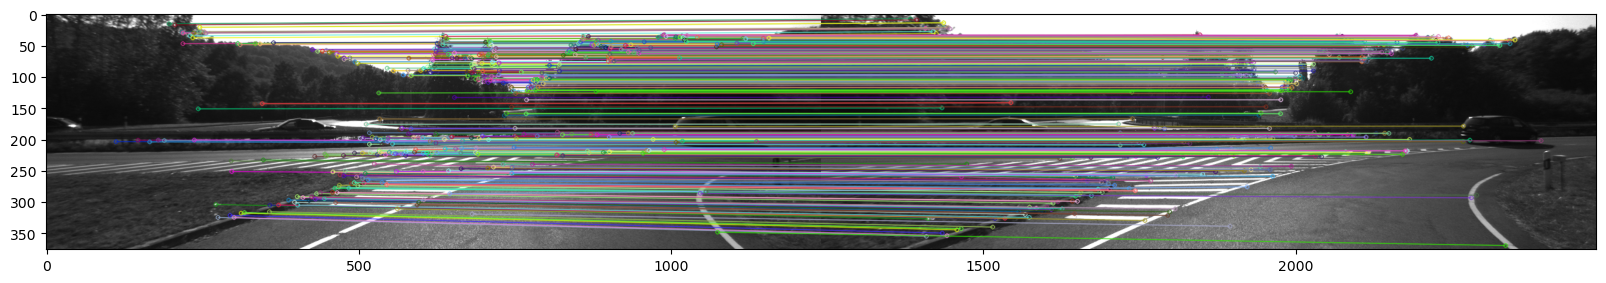

In [18]:
# visualize good matches side by side on two images
img_match = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=2)
plt.figure(figsize=(20, 20))
plt.imshow(img_match)
plt.show()